In [1]:
import warnings; 
warnings.simplefilter('ignore')

In [2]:
!pip install pystan
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  ERROR: Command errored out with exit status 1:
   command: /Users/rakeshnagarajappa/opt/anaconda3/envs/fbpro/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/gw/8x9qmfqj6q38yzcz4q6rv4sc0000gn/T/pip-install-2u93psqm/fbprophet_c13f0557c1834271a5da79d9c32b0380/setup.py'"'"'; __file__='"'"'/private/var/folders/gw/8x9qmfqj6q38yzcz4q6rv4sc0000gn/T/pip-install-2u93psqm/fbprophet_c13f0557c1834271a5da79d9c32b0380/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/gw/8x9qmfqj6q38yzcz4q6rv4sc0000gn/T/pip-wheel-8477988_
       cwd: /private/var/folders/gw/8x9qmfqj6q38yzcz4q6rv4sc0000gn/T/pip-install-2u93psqm/fbprophet_c13f0557c1834271a5da79d9c32b0380/
  Complete output (10 lines):
  running bdist_wheel
  running build
  running build_py
  creating bui

In [2]:
import pandas as pd
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [3]:
df=pd.read_csv("../dataset/CaliforniaVaccination.csv",usecols=[0,7])

In [6]:
county = pd.read_csv("../dataset/CountyWiseCases.csv")
county.head()

,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,2021-04-24,Alameda,County,1685886.0,0.0,0.0,NaN,NaN,81.0,1.0,7720.0
1,2021-04-24,Alpine,County,1117.0,0.0,0.0,NaN,NaN,0.0,0.0,4.0
2,2021-04-24,Amador,County,38531.0,0.0,0.0,NaN,NaN,3.0,0.0,148.0
3,2021-04-24,Butte,County,217769.0,0.0,0.0,NaN,NaN,6.0,0.0,287.0
4,2021-04-24,Calaveras,County,44289.0,0.0,0.0,NaN,NaN,3.0,0.0,95.0


In [7]:
county['date'] = pd.DatetimeIndex(county['date'])
county.dtypes

date               datetime64[ns]
area                       object
area_type                  object
population                float64
cases                     float64
deaths                    float64
total_tests               float64
positive_tests            float64
reported_cases            float64
reported_deaths           float64
reported_tests            float64
dtype: object

In [8]:
#Getting the county wise data
import datetime
df = county.loc[(county["area"] == "Santa Clara")]
df.head(7)

,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
44,2021-04-24,Santa Clara,County,1967585.0,0.0,0.0,NaN,NaN,81.0,3.0,14233.0
105,2021-04-23,Santa Clara,County,1967585.0,2.0,0.0,307.0,3.0,136.0,11.0,17467.0
166,2021-04-22,Santa Clara,County,1967585.0,25.0,1.0,9686.0,40.0,139.0,8.0,14561.0
227,2021-04-21,Santa Clara,County,1967585.0,100.0,0.0,14053.0,122.0,90.0,2.0,21885.0
288,2021-04-20,Santa Clara,County,1967585.0,115.0,0.0,17421.0,141.0,129.0,0.0,7178.0
349,2021-04-19,Santa Clara,County,1967585.0,142.0,0.0,21511.0,177.0,103.0,0.0,8393.0
410,2021-04-18,Santa Clara,County,1967585.0,86.0,0.0,5373.0,102.0,109.0,0.0,14698.0


In [6]:
cs.population.unique()[0]

NameError: name 'cs' is not defined

In [234]:
cs = df[df['date'] > '2021-04-16']
cs = cs[1:]
#calculating current number of cases per 100k
mean = cs.agg({'reported_cases': ['mean']})
population = cs.population.unique()
div = population[0]/100000
curr_cases = mean['reported_cases']/div
print(curr_cases['mean'])

6.534478996913911


In [216]:
#calculating average positive tests
c_sum = 0;
for index, row in cs.iterrows():
    t_avg = (row['positive_tests']/row['reported_tests'])*100
    c_sum +=t_avg
pos = c_sum/7;
pos
    

0.8946596701666224

In [9]:
#Filtering the county data for prediction 
df = df[df['date'] > '2020-12-01']
df = df[["date","reported_cases"]]
df.tail()


,date,reported_cases
8523,2020-12-06,773.0
8584,2020-12-05,874.0
8645,2020-12-04,844.0
8706,2020-12-03,743.0
8767,2020-12-02,481.0


In [140]:
df.tail()

,date,reported_cases
8479,2020-12-06,696.0
8540,2020-12-05,910.0
8601,2020-12-04,687.0
8662,2020-12-03,487.0
8723,2020-12-02,445.0


In [128]:
df.describe()

,reported_cases
count,388.000000
mean,220.951031
std,271.655904
min,-788.000000
25%,67.750000
50%,113.000000
75%,247.750000
max,2317.000000


In [10]:
#setting the date time index on date column
df['ds'] = pd.DatetimeIndex(df['date'])
df.drop('date', axis=1, inplace=True)
df_train = df[0:]

In [98]:
df.dtypes

reported_cases           float64
ds                datetime64[ns]
dtype: object

In [11]:
#renaming the columns as required by the prophet
df_train.columns = ['y','ds']
df_train.tail()

,y,ds
8523,773.0,2020-12-06
8584,874.0,2020-12-05
8645,844.0,2020-12-04
8706,743.0,2020-12-03
8767,481.0,2020-12-02


In [53]:
forecast[['ds','yhat']]

,ds,yhat
0,2021-01-19,2.615568e+05
1,2021-01-20,2.672398e+05
2,2021-01-21,2.764013e+05
3,2021-01-22,3.086372e+05
4,2021-01-23,3.510873e+05
...,...,...
106,2021-05-05,1.138317e+07
107,2021-05-06,1.151842e+07
108,2021-05-07,1.167675e+07
109,2021-05-08,1.184528e+07


In [13]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [29]:
p_error = mean_squared_error(df_test.people_fully_vaccinated,df_forcasted.yhat)

In [30]:
np.sqrt(p_error)

554440.755476227

In [30]:
#prediction model for active cases in county
m = Prophet(interval_width=0.95,changepoint_prior_scale=0.5,mcmc_samples=30)
model = m.fit(df_train)
future = m.make_future_dataframe(periods=90,freq='D')
forecast = m.predict(future)
forecast.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-02,829.914175,150.426707,1295.247984,556.661272,1006.189328,-113.095339,-240.716354,-3.479095,-113.095339,-240.716354,-3.479095,0.0,0.0,0.0,716.818835
1,2020-12-03,864.897641,421.215171,1556.156922,617.255358,1020.205211,90.694676,-16.912612,181.179226,90.694676,-16.912612,181.179226,0.0,0.0,0.0,955.592317
2,2020-12-04,899.881107,406.586587,1560.631998,677.849445,1036.145314,69.249932,-14.451742,142.218114,69.249932,-14.451742,142.218114,0.0,0.0,0.0,969.131038
3,2020-12-05,934.864573,418.907947,1550.182660,738.443531,1051.293471,67.017025,-53.619018,162.041782,67.017025,-53.619018,162.041782,0.0,0.0,0.0,1001.881597
4,2020-12-06,969.848039,401.798061,1585.862181,799.037618,1076.635482,35.975693,-65.649293,144.282153,35.975693,-65.649293,144.282153,0.0,0.0,0.0,1005.823731


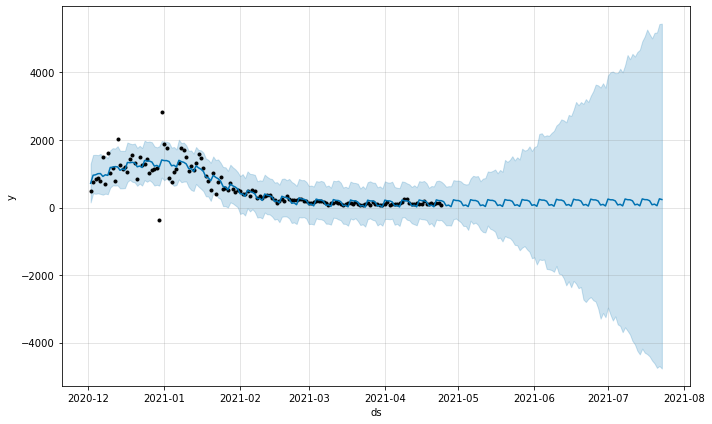

In [31]:
plot1 = m.plot(forecast)

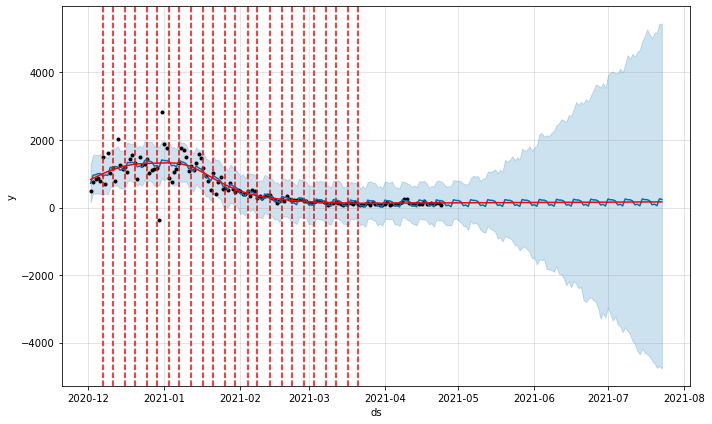

In [32]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [250]:
forecast[['ds','yhat']].tail(7)

,ds,yhat
227,2021-07-17,95.215627
228,2021-07-18,69.540933
229,2021-07-19,-34.535540
230,2021-07-20,-31.774614
231,2021-07-21,-93.858455
232,2021-07-22,116.002128
233,2021-07-23,98.695793


In [251]:
fc = forecast[['ds','yhat']].tail(7)
c_sum = 0;
div = population[0]/100000
for index, row in fc.iterrows():
    if(row['yhat'] > 0):
        t_a = row['yhat']/div
        c_sum +=t_a
pos = c_sum/7;
print(c_sum,pos)

19.285290382567183 2.7550414832238834


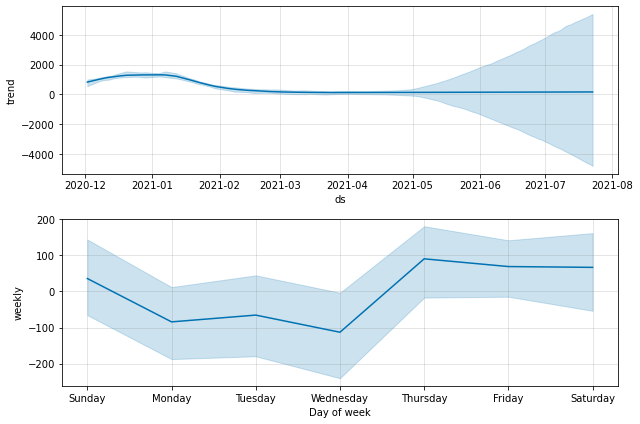

In [33]:
plt2 = m.plot_components(forecast)

In [34]:
#validation of prediction model
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='100 days', period='15 days', horizon = '30 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-03-25 00:00:00 and 2021-03-25 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-03-26,170.739901,-469.306516,839.344903,82.0,2021-03-25
1,2021-03-27,153.944662,-473.381936,804.103356,165.0,2021-03-25
2,2021-03-28,125.920866,-488.061029,751.056542,108.0,2021-03-25
3,2021-03-29,-20.407316,-655.089181,626.571429,103.0,2021-03-25
4,2021-03-30,-6.270776,-645.689182,568.778581,78.0,2021-03-25


In [35]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2772.715984,52.656585,39.238702,0.438377,0.165934,1.0
1,4 days,5224.247892,72.278959,50.794507,0.477022,0.165934,1.0
2,5 days,7550.695634,86.894739,75.199653,0.814819,1.080395,1.0
3,6 days,15539.668554,124.658207,121.174805,1.363563,1.198129,1.0
4,7 days,11950.987490,109.320572,102.308400,1.172312,1.080395,1.0


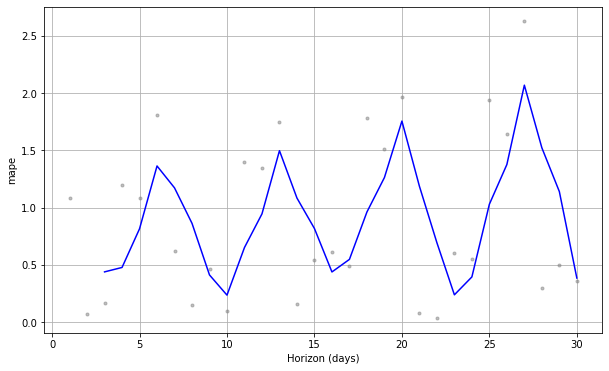

In [36]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
#MODEL WITHOUT THE TUNING PARAMETERS

In [11]:
m = Prophet(interval_width=0.95)
model = m.fit(df_train)
future = m.make_future_dataframe(periods=90,freq='D')
forecast = m.predict(future)
forecast.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-02,1347.355778,560.898057,1838.571402,1347.355778,1347.355778,-133.201823,-133.201823,-133.201823,-133.201823,-133.201823,-133.201823,0.0,0.0,0.0,1214.153954
1,2020-12-03,1336.035460,777.551658,2076.270510,1336.035460,1336.035460,81.824252,81.824252,81.824252,81.824252,81.824252,81.824252,0.0,0.0,0.0,1417.859711
2,2020-12-04,1324.715142,730.195664,1978.554409,1324.715142,1324.715142,69.425846,69.425846,69.425846,69.425846,69.425846,69.425846,0.0,0.0,0.0,1394.140989
3,2020-12-05,1313.394824,719.056321,2015.325821,1313.394824,1313.394824,65.117150,65.117150,65.117150,65.117150,65.117150,65.117150,0.0,0.0,0.0,1378.511974
4,2020-12-06,1302.074507,672.321148,1971.733603,1302.074507,1302.074507,35.902273,35.902273,35.902273,35.902273,35.902273,35.902273,0.0,0.0,0.0,1337.976779


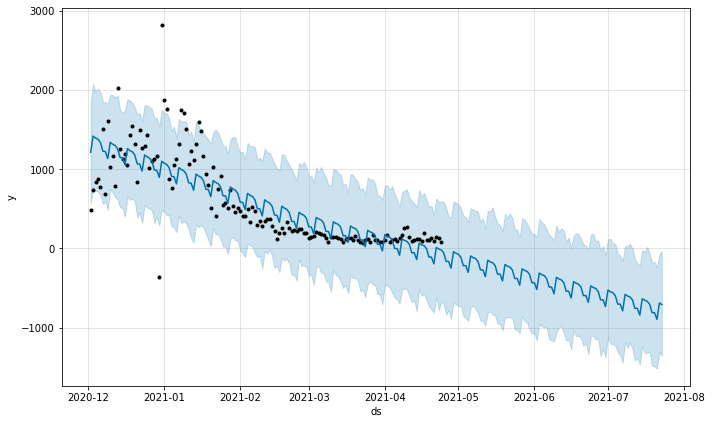

In [12]:
plot1 = m.plot(forecast)

In [13]:
#validation of prediction model
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='100 days', period='15 days', horizon = '30 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-03-25 00:00:00 and 2021-03-25 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-03-26,-21.777958,-704.471594,669.405742,82.0,2021-03-25
1,2021-03-27,-43.584939,-697.113961,600.801719,165.0,2021-03-25
2,2021-03-28,-71.333184,-760.930759,612.566490,108.0,2021-03-25
3,2021-03-29,-199.376003,-832.780797,478.508282,103.0,2021-03-25
4,2021-03-30,-202.289529,-864.830164,419.365068,78.0,2021-03-25


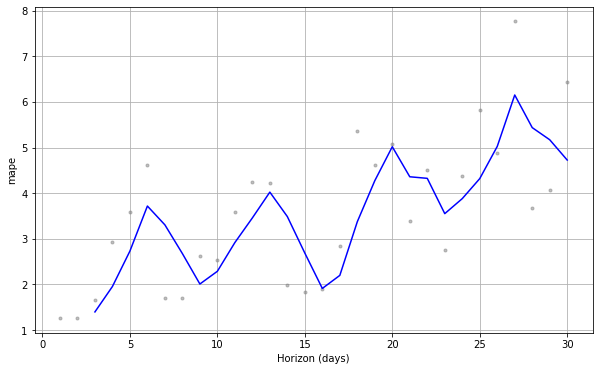

In [14]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [19]:
m = Prophet(interval_width=0.95,changepoint_prior_scale=1.5)
model = m.fit(df_train)
future = m.make_future_dataframe(periods=90,freq='D')
forecast = m.predict(future)
forecast.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-02,762.604210,141.251834,1155.790504,762.604210,762.604210,-120.231913,-120.231913,-120.231913,-120.231913,-120.231913,-120.231913,0.0,0.0,0.0,642.372298
1,2020-12-03,809.000904,433.584112,1382.274535,809.000904,809.000904,89.040580,89.040580,89.040580,89.040580,89.040580,89.040580,0.0,0.0,0.0,898.041484
2,2020-12-04,855.397598,461.040449,1394.658081,855.397598,855.397598,70.595375,70.595375,70.595375,70.595375,70.595375,70.595375,0.0,0.0,0.0,925.992973
3,2020-12-05,901.794293,478.689963,1460.129813,901.794293,901.794293,61.376453,61.376453,61.376453,61.376453,61.376453,61.376453,0.0,0.0,0.0,963.170745
4,2020-12-06,948.190987,489.345676,1480.625703,948.190987,948.190987,35.898936,35.898936,35.898936,35.898936,35.898936,35.898936,0.0,0.0,0.0,984.089923


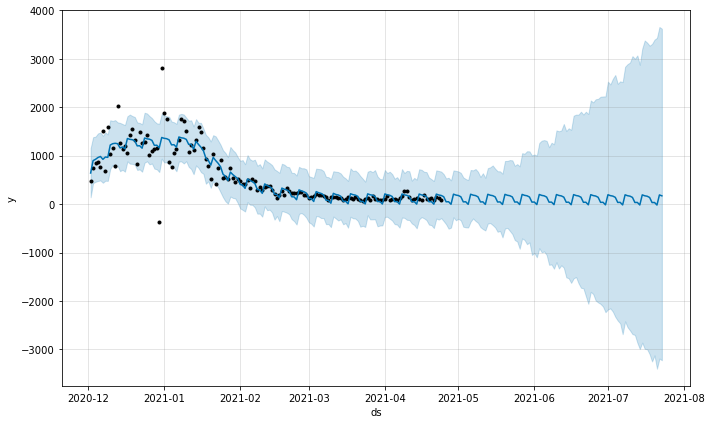

In [20]:
plot1 = m.plot(forecast)

In [21]:
#validation of prediction model
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='100 days', period='15 days', horizon = '30 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-03-25 00:00:00 and 2021-03-25 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-03-26,165.172948,-375.825913,696.569276,82.0,2021-03-25
1,2021-03-27,143.645915,-388.086610,663.913775,165.0,2021-03-25
2,2021-03-28,115.931312,-422.168394,633.365390,108.0,2021-03-25
3,2021-03-29,-14.746049,-565.198985,510.614515,103.0,2021-03-25
4,2021-03-30,-14.475169,-562.217429,525.645895,78.0,2021-03-25


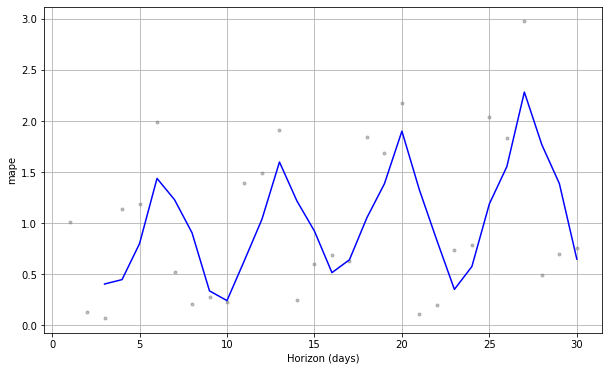

In [22]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')